In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('emprestimo.csv', ';')

In [3]:
df

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [4]:
df['tem_conta'], _ = pd.factorize(df['tem_conta'])

In [5]:
print(df['tem_conta'].unique())

[0 1]


In [6]:
df['montante'], _ = pd.factorize(df['montante'])

In [7]:
print(df['montante'].unique())

[0 1 2]


In [8]:
df['idade'], _ = pd.factorize(df['idade'])

In [9]:
print(df['idade'].unique())

[0 1 2]


In [10]:
df['salario'], _ = pd.factorize(df['salario'])

In [11]:
print(df['salario'].unique())

[0 1]


In [12]:
df['empresta'], class_names = pd.factorize(df['empresta'])

In [13]:
print(df['empresta'].unique())

[0 1]


In [14]:
print(class_names)

Index(['Nao', 'Sim'], dtype='object')


   # Abordagem 1 - Dados de Treinamento usados para Teste

In [15]:
feature_cols = ['montante', 'idade', 'salario', 'tem_conta']

In [16]:
x_train = df[feature_cols]

In [17]:
x_train

,montante,idade,salario,tem_conta
0,0,0,0,0
1,0,0,0,1
2,1,0,0,0
3,2,1,0,0
4,2,2,1,0
5,2,2,1,1
6,1,2,1,1
7,0,1,0,0
8,0,2,1,0
9,2,1,1,0


In [18]:
y_train = df.empresta

In [19]:
y_train

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: empresta, dtype: int64

In [20]:
x_train.columns

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object')

In [21]:
df.columns

Index(['montante', 'idade', 'salario', 'tem_conta', 'empresta'], dtype='object')

In [22]:
clf = dtc(criterion='entropy')

In [23]:
clf = clf.fit(x_train, y_train)

In [24]:
clf

DecisionTreeClassifier(criterion='entropy')

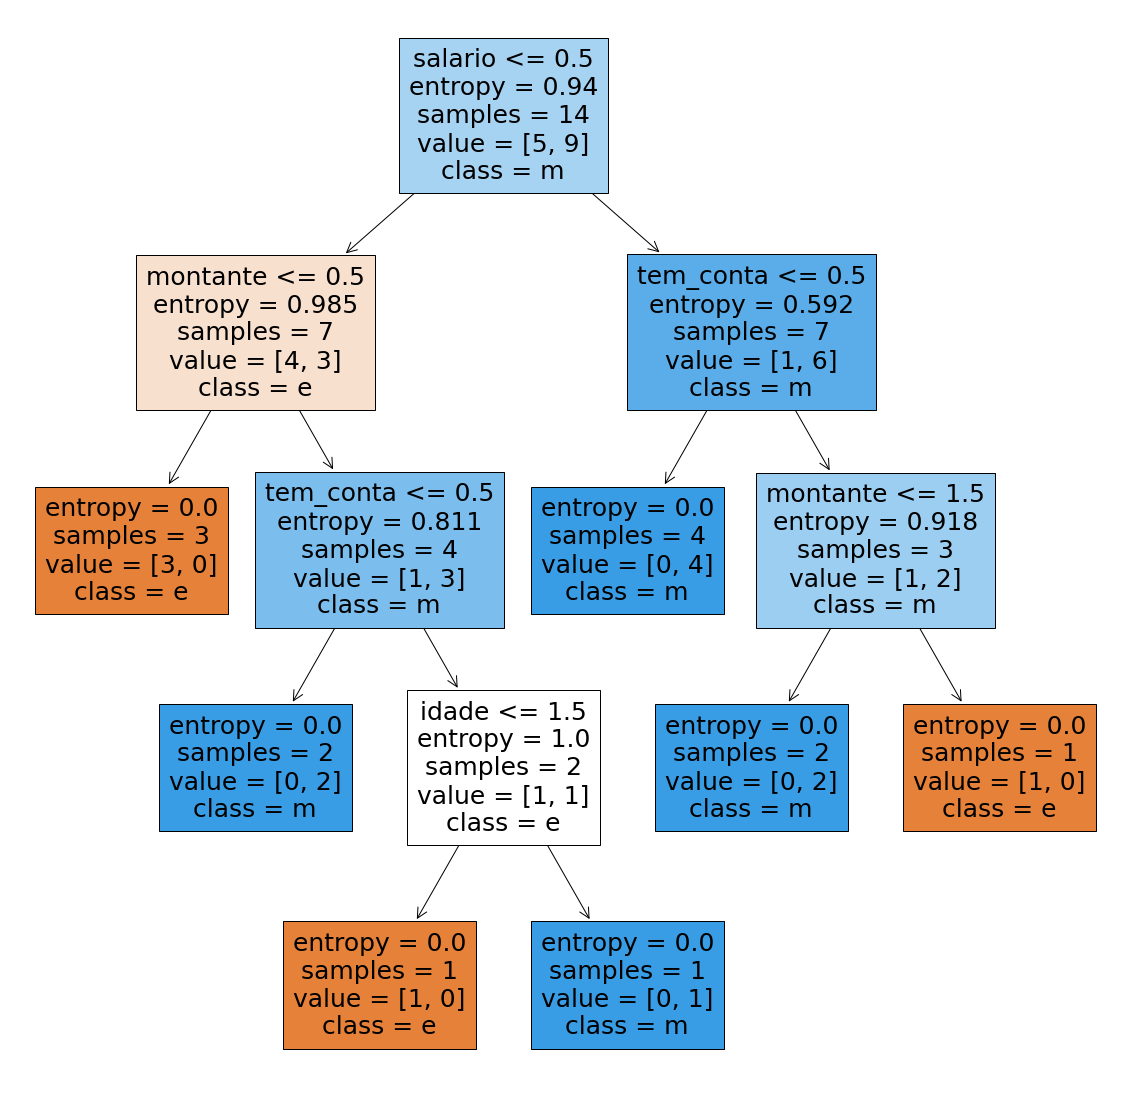

In [25]:
fig1 = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, feature_names=x_train.columns,class_names=df.columns[4], filled=True)


# Abordagem 2 - 70% dados de Treinamento e 30% dados de Teste

In [26]:
feature_cols2 = ['montante', 'idade', 'salario', 'tem_conta']

In [27]:
x_train2 = df[feature_cols2]

In [28]:
y_train2 = df.empresta

In [29]:
x_train2, x_test, y_train2, y_test = train_test_split(x_train2, y_train2, test_size=0.3, random_state=1)

In [51]:
x_train2

,montante,idade,salario,tem_conta
4,2,2,1,0
1,0,0,0,1
12,1,0,1,0
0,0,0,0,0
13,2,1,0,1
9,2,1,1,0
8,0,2,1,0
11,1,2,0,1
5,2,2,1,1


In [31]:
x_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [32]:
clf2 = dtc(criterion='entropy')

In [33]:
clf2 = clf2.fit(x_train2, y_train2)

In [34]:
clf2

DecisionTreeClassifier(criterion='entropy')

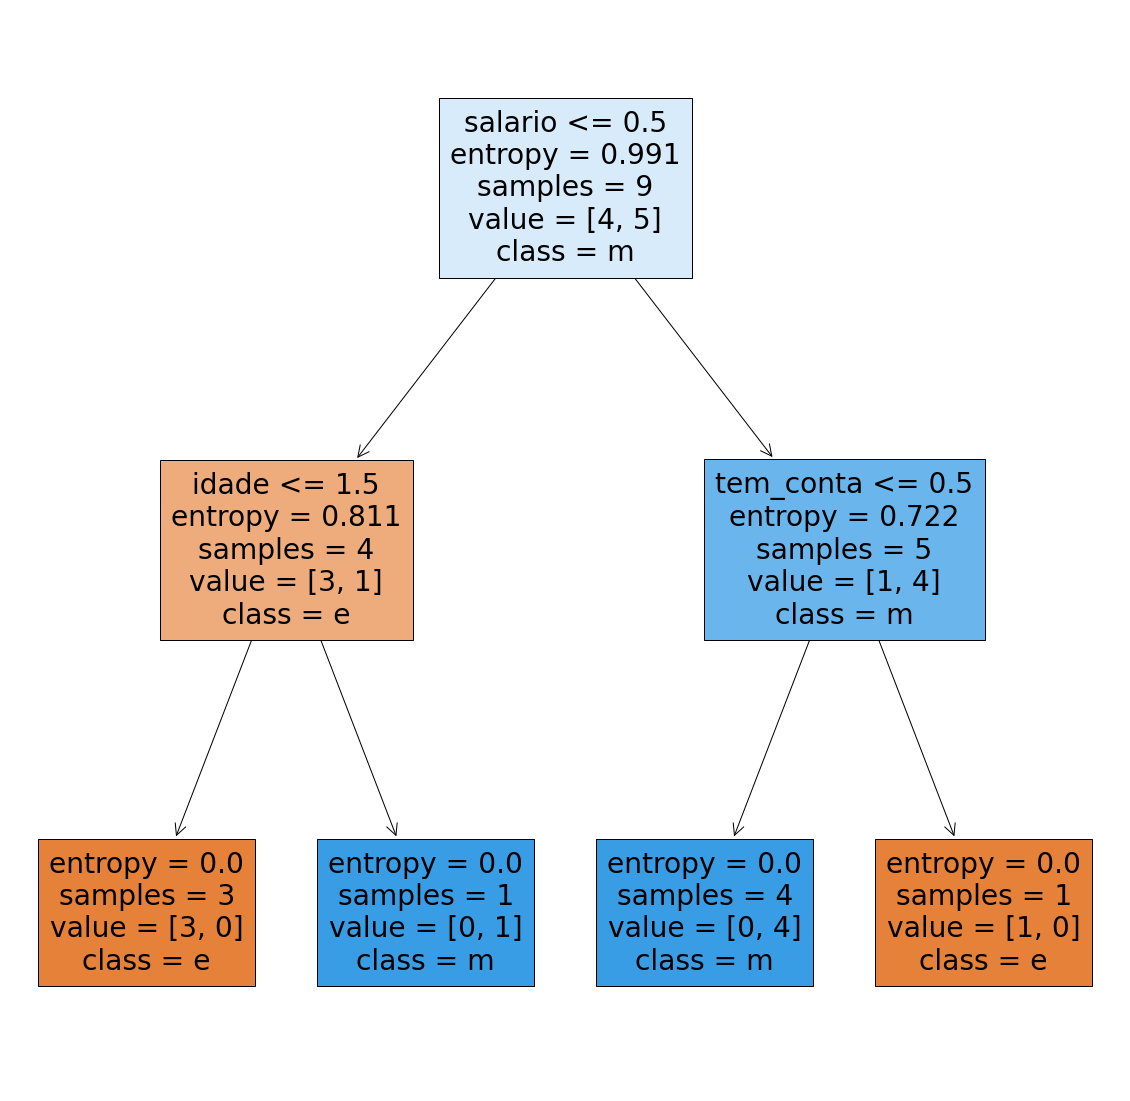

In [35]:
fig2 = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf2, feature_names=x_train2.columns,class_names=df.columns[4], filled=True)

In [46]:
y_pred = clf2.predict(x_train)

In [47]:
count_misclassified = (y_train != y_pred).sum()

In [48]:
count_misclassified

4

In [50]:
accuracy = metrics.accuracy_score(y_train, y_pred)

In [40]:
accuracy

0.2

In [41]:
# Para a Entrada montante=1 ; idade=2; salario=1; tem_conta=1
w_test = np.array([[1, 2, 1, 1]])

In [42]:
y_pred = clf2.predict(w_test)

In [43]:
y_pred

array([0])

In [44]:
# Resposta: 1 (Sim) - referente ao item 6 do dataset conforme abaixo:

In [45]:
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1
